<a href="https://colab.research.google.com/github/Someshwarms/Flight-Price-Prediction/blob/main/Flight_Fair_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

**Loading the flight dataset and you can dowload the dataset from this link:https://www.kaggle.com/singhakash/flight-price-prediction/data?select=Data_Train.xlsx**

In [ ]:
df=pd.read_excel("/content/drive/MyDrive/Data_Train.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [ ]:
df.shape

(10683, 11)

**As we can see there is null values lets take care of by droping them because null values for this case are very less in number**

In [ ]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()
#As we can there is no null values is present in the data

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


**From description we can see that Date of Journey is a object data type Therefore we have to convert this datatype into timestamp so as to use this column properly for prediction**

In [ ]:
df['Journey_Day']=pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.day

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1


In [ ]:
df['Journey_Month']=pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.month

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [ ]:
df['Dep_hour']=pd.to_datetime(df['Dep_Time']).dt.hour

In [ ]:
df['Dep_minute']=pd.to_datetime(df['Dep_Time']).dt.minute

In [ ]:
df['Arrival_hour']=pd.to_datetime(df['Arrival_Time']).dt.hour

In [ ]:
df['Arrival_minute']=pd.to_datetime(df['Arrival_Time']).dt.minute

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [ ]:
duration=list(df['Duration'])
for i in range(len(duration)):
  if len(duration[i].split())!=2:
    if "h" in duration[i]:
      duration[i]=duration[i].strip() + " 0m"
    else:
      duration[i]="0h " +duration[i]
  
duration_hours=[]
duration_minute=[]

for i in range(len(duration)):
  duration_hours.append(int(duration[i].split(sep = "h")[0]))
  duration_minute.append(int(duration[i].split(sep = "m")[0].split()[-1])) 

In [ ]:
df["Duration_hours"]=duration_hours
df["Duration_minute"]=duration_minute

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


**Now we will convert all the categorical value into numerical value**

In [ ]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [ ]:
df['Airline'].replace(to_replace="Jet Airways",value=0,inplace=True)

In [ ]:
df['Airline'].replace(to_replace="IndiGo",value=1,inplace=True)
df['Airline'].replace(to_replace="Air India",value=2,inplace=True)
df['Airline'].replace(to_replace="Multiple carriers",value=3,inplace=True)
df['Airline'].replace(to_replace="SpiceJet",value=4,inplace=True)
df['Airline'].replace(to_replace="Vistara",value=5,inplace=True)
df['Airline'].replace(to_replace="GoAir",value=7,inplace=True)
df['Airline'].replace(to_replace="Multiple carriers Premium economy",value=8,inplace=True)
df['Airline'].replace(to_replace="Jet Airways Business",value=9,inplace=True)
df['Airline'].replace(to_replace="Vistara Premium economy",value=11,inplace=True)
df['Airline'].replace(to_replace="Trujet",value=22,inplace=True)

In [ ]:
df['Airline'].replace(to_replace="Air Asia",value=6,inplace=True)

In [ ]:
df['Airline'].value_counts()

0     3849
1     2053
2     1751
3     1196
4      818
5      479
6      319
7      194
8       13
9        6
11       3
22       1
Name: Airline, dtype: int64

In [ ]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [ ]:
df['Source'].replace(to_replace="Delhi",value=0,inplace=True)
df['Source'].replace(to_replace="Kolkata",value=1,inplace=True)
df['Source'].replace(to_replace="Banglore",value=2,inplace=True)
df['Source'].replace(to_replace="Mumbai",value=3,inplace=True)
df['Source'].replace(to_replace="Chennai",value=4,inplace=True)

In [ ]:
df['Source'].value_counts()

0    4536
1    2871
2    2197
3     697
4     381
Name: Source, dtype: int64

In [ ]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [ ]:
df['Destination'].replace(to_replace="Banglore",value=6,inplace=True)
df['Destination'].replace(to_replace="Delhi",value=7,inplace=True)
df['Destination'].replace(to_replace="New Delhi",value=8,inplace=True)
df['Destination'].replace(to_replace="Hyderabad",value=9,inplace=True)
df['Destination'].replace(to_replace="Kolkata",value=11,inplace=True)

In [ ]:
df['Destination'].replace(to_replace="Cochin",value=5,inplace=True)

In [ ]:
df['Destination'].value_counts()

5     4536
6     2871
7     1265
8      932
9      697
11     381
Name: Destination, dtype: int64

In [ ]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [ ]:
df['Total_Stops'].replace(to_replace="1 stop",value=0.1,inplace=True)
df['Total_Stops'].replace(to_replace="non-stop",value=0.0,inplace=True)
df['Total_Stops'].replace(to_replace="2 stops",value=0.2,inplace=True)
df['Total_Stops'].replace(to_replace="3 stops",value=0.3,inplace=True)
df['Total_Stops'].replace(to_replace="4 stops",value=0.4,inplace=True)

In [ ]:
df['Total_Stops'].value_counts()

0.1    5625
0.0    3491
0.2    1520
0.3      45
0.4       1
Name: Total_Stops, dtype: int64

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minute
0,1,24/03/2019,2,8,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0.0,No info,3897,24,3,22,20,1,10,2,50
1,2,1/05/2019,1,6,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,0.2,No info,7662,1,5,5,50,13,15,7,25
2,0,9/06/2019,0,5,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,0.2,No info,13882,9,6,9,25,4,25,19,0
3,1,12/05/2019,1,6,CCU → NAG → BLR,18:05,23:30,5h 25m,0.1,No info,6218,12,5,18,5,23,30,5,25
4,1,01/03/2019,2,8,BLR → NAG → DEL,16:50,21:35,4h 45m,0.1,No info,13302,1,3,16,50,21,35,4,45


**Now we will divide the dataset into independent and dependent feature and drop all those which is not required**

In [ ]:
X=df.drop(['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration','Additional_Info','Price'],axis=1)#independent

In [ ]:
y=df['Price']#dependent

In [ ]:
X.head()

,Airline,Source,Destination,Total_Stops,Journey_Day,Journey_Month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minute
0,1,2,8,0.0,24,3,22,20,1,10,2,50
1,2,1,6,0.2,1,5,5,50,13,15,7,25
2,0,0,5,0.2,9,6,9,25,4,25,19,0
3,1,1,6,0.1,12,5,18,5,23,30,5,25
4,1,2,8,0.1,1,3,16,50,21,35,4,45


In [ ]:
X.shape

(10682, 12)

In [ ]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [ ]:
y.shape

(10682,)

**Now out of all the selected feature we will apply correlation on it  to select correct features for model training and testing**

In [ ]:
X.corr()

,Airline,Source,Destination,Total_Stops,Journey_Day,Journey_Month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minute
Airline,1.000000,0.061924,0.054528,-0.201019,0.016799,-0.032243,-0.067664,0.056423,0.032652,0.084416,-0.245108,0.078128
Source,0.061924,1.000000,0.979418,-0.590943,-0.066410,-0.167047,0.035173,0.117637,-0.028430,0.148661,-0.434206,0.095355
Destination,0.054528,0.979418,1.000000,-0.530287,-0.062712,-0.210149,0.014927,0.127543,-0.029566,0.117325,-0.397035,0.056704
Total_Stops,-0.201019,-0.590943,-0.530287,1.000000,-0.009451,0.054383,-0.061476,-0.002618,0.038140,-0.106940,0.739916,-0.136706
Journey_Day,0.016799,-0.066410,-0.062712,-0.009451,1.000000,-0.038359,0.002170,-0.008170,-0.003245,-0.017510,-0.022059,-0.008940
Journey_Month,-0.032243,-0.167047,-0.210149,0.054383,-0.038359,1.000000,0.039127,-0.059267,-0.003927,-0.100626,0.016141,-0.040897
Dep_hour,-0.067664,0.035173,0.014927,-0.061476,0.002170,0.039127,1.000000,-0.024745,0.005180,0.067911,0.002869,-0.023707
Dep_minute,0.056423,0.117637,0.127543,-0.002618,-0.008170,-0.059267,-0.024745,1.000000,0.043122,-0.017597,-0.022104,0.092485
Arrival_hour,0.032652,-0.028430,-0.029566,0.038140,-0.003245,-0.003927,0.005180,0.043122,1.000000,-0.154363,0.055276,-0.118309
Arrival_minute,0.084416,0.148661,0.117325,-0.106940,-0.017510,-0.100626,0.067911,-0.017597,-0.154363,1.000000,-0.074450,0.151628


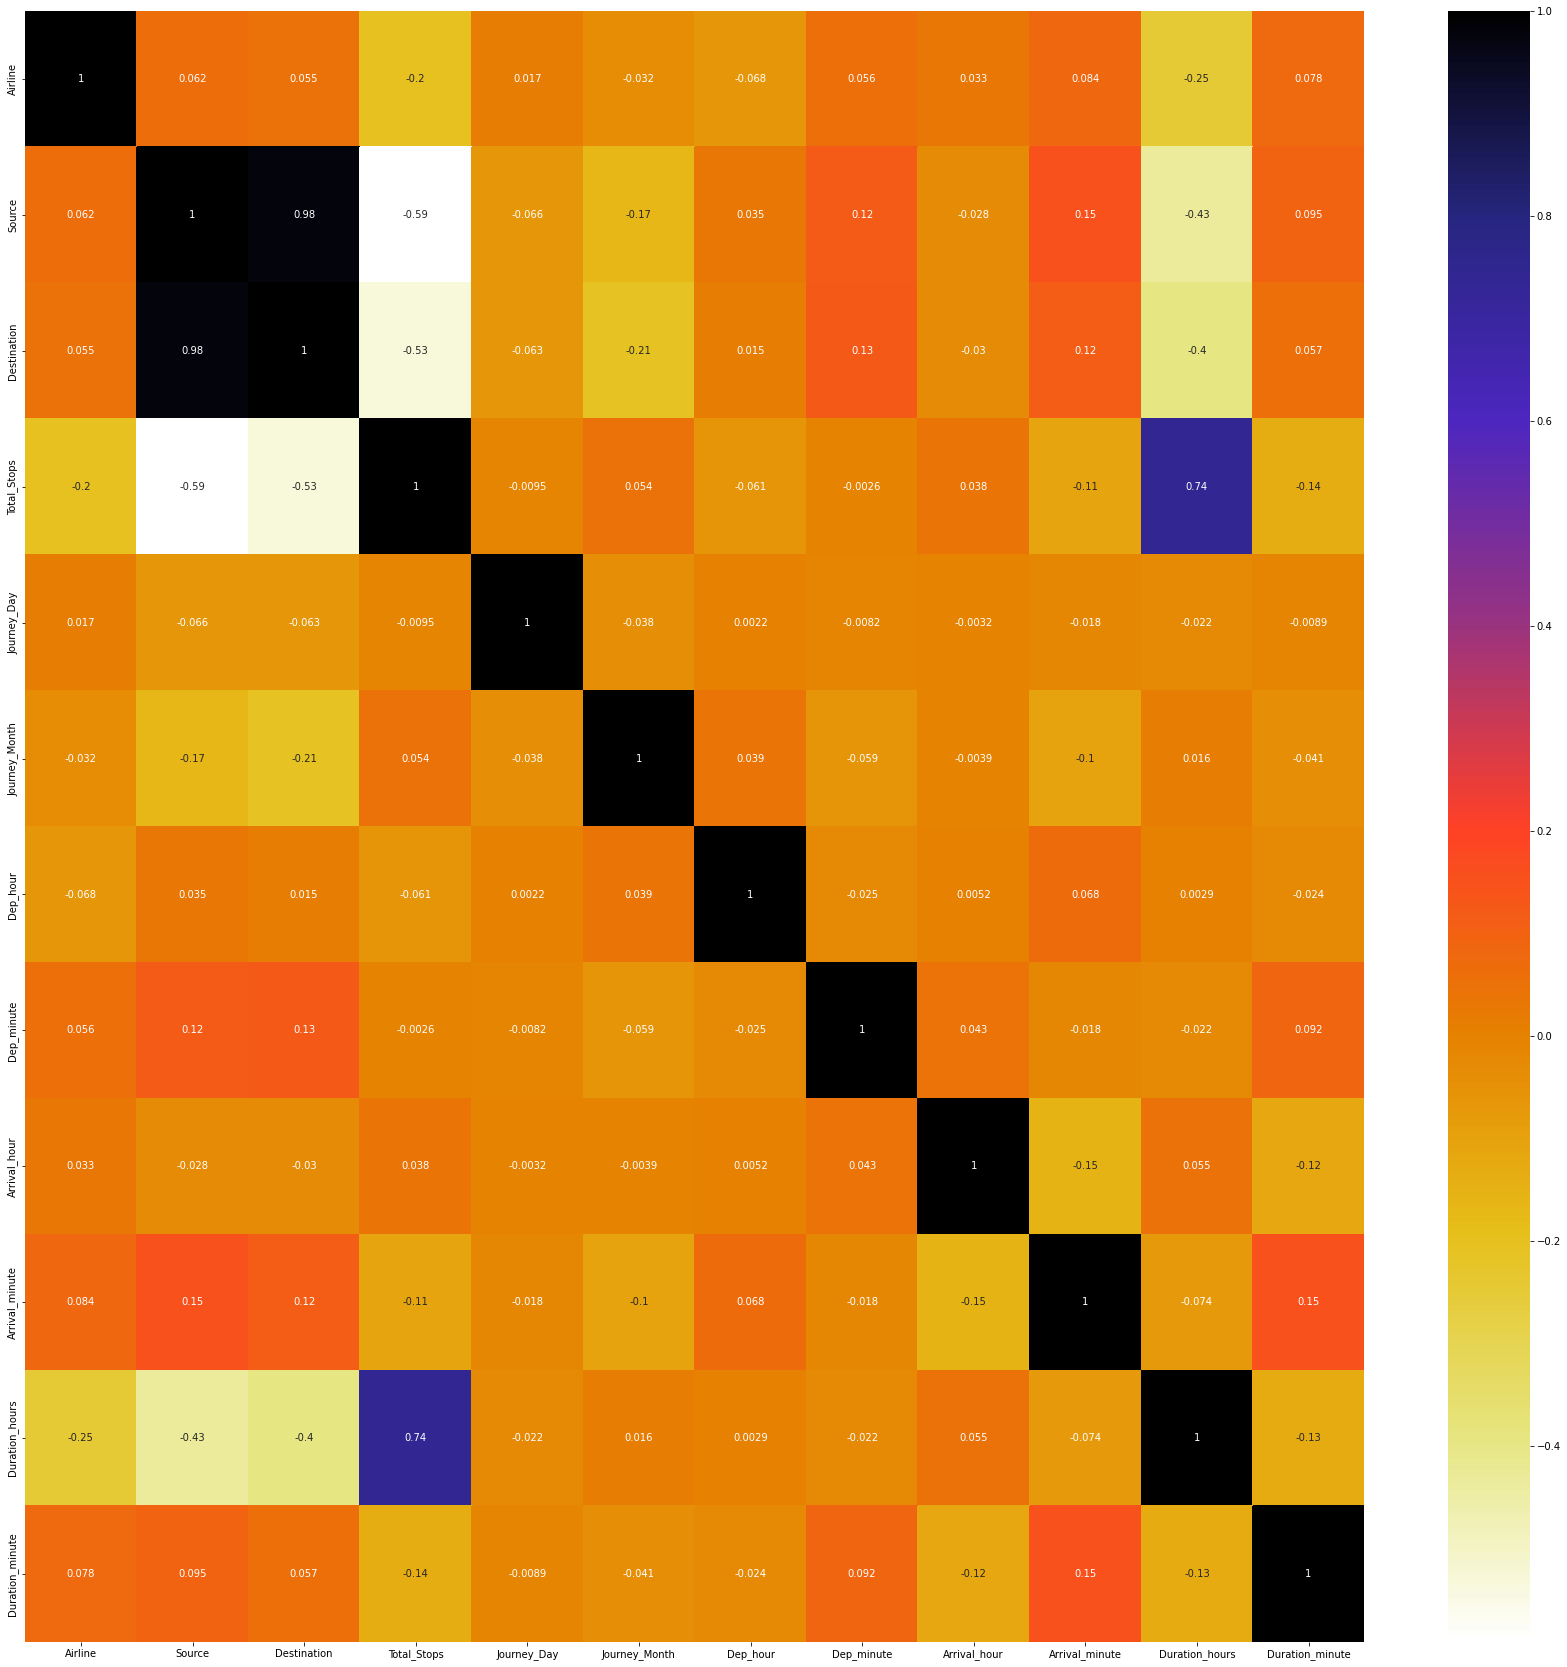

In [ ]:
plt.figure(figsize=(30,30))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

**As we can see there is no single feature which is correlated to each other so need to drop any feature** 

In [ ]:
corr_features = correlation(X, 0.9)
len(set(corr_features))

0

In [ ]:
corr_features

set()

**Using train_test_split we will divide the dataset into training and testing**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
X_train.shape

(7477, 12)

In [ ]:
y_train.shape

(7477,)

**We will use different algorithms for training and testing to see which will give the best result and which ever algorithm will give the best result that will be selected for predictions and to check the result we will use MSE,MAE,and RMSE.**

In [ ]:
model=RandomForestRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [ ]:
y_pred

array([16703.42,  5369.86,  8756.59, ...,  5857.64,  3390.07,  7003.52])

In [ ]:
print("MSE:",mean_squared_error(y_pred,y_test))
print("MSE:",mean_absolute_error(y_pred,y_test))
print("MSE:",np.sqrt(mean_squared_error(y_pred,y_test)))

MSE: 4138990.3677075547
MSE: 1180.1575140937152
MSE: 2034.4508762089968


In [ ]:
metrics.r2_score(y_test,y_pred)

0.7971175303428305

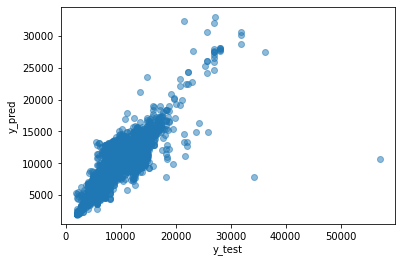

In [ ]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [ ]:
model1=AdaBoostRegressor()
model1.fit(X_train,y_train)
y_pred1=model1.predict(X_test)

In [ ]:
print("MSE:",mean_squared_error(y_pred1,y_test))
print("MSE:",mean_absolute_error(y_pred1,y_test))
print("MSE:",np.sqrt(mean_squared_error(y_pred1,y_test)))

MSE: 11982473.768944308
MSE: 2918.242969430008
MSE: 3461.570997241615


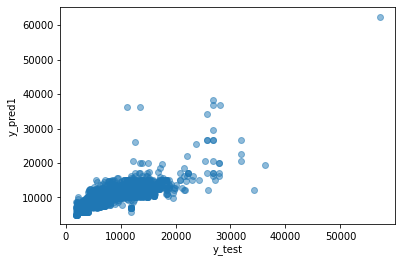

In [ ]:
plt.scatter(y_test, y_pred1, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred1")
plt.show()

In [ ]:
model2=GradientBoostingRegressor()
model2.fit(X_train,y_train)
y_pred2=model2.predict(X_test)

In [ ]:
print("MSE:",mean_squared_error(y_pred2,y_test))
print("MSE:",mean_absolute_error(y_pred2,y_test))
print("MSE:",np.sqrt(mean_squared_error(y_pred2,y_test)))

MSE: 4665033.255257981
MSE: 1528.5899929936002
MSE: 2159.868805103213


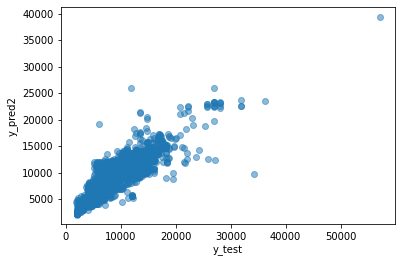

In [ ]:
plt.scatter(y_test, y_pred2, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred2")
plt.show()

In [ ]:
mn=MinMaxScaler()
X_train_scaled=mn.fit_transform(X_train)
X_test_scaled=mn.transform(X_test)

In [ ]:
model3=LinearRegression()
model3.fit(X_train_scaled,y_train)
y_pred3=model3.predict(X_test_scaled)

In [ ]:
print("MSE:",mean_squared_error(y_pred3,y_test))
print("MSE:",mean_absolute_error(y_pred3,y_test))
print("MSE:",np.sqrt(mean_squared_error(y_pred3,y_test)))

MSE: 10752748.299291706
MSE: 2325.5849918705553
MSE: 3279.1383470801757


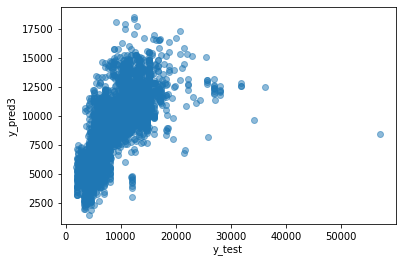

In [ ]:
plt.scatter(y_test, y_pred3, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred3")
plt.show()

In [ ]:
model4=SVR(kernel="rbf")
model4.fit(X_train_scaled,y_train)
y_pred4=model4.predict(X_test_scaled)

In [ ]:
print("MSE:",mean_squared_error(y_pred4,y_test))
print("MSE:",mean_absolute_error(y_pred4,y_test))
print("MSE:",np.sqrt(mean_squared_error(y_pred4,y_test)))

MSE: 19876834.151557613
MSE: 3483.1220297199684
MSE: 4458.3443285100375


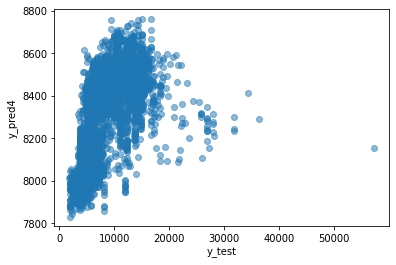

In [ ]:
plt.scatter(y_test, y_pred4, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred4")
plt.show()

In [ ]:
model5=MultinomialNB()
model5.fit(X_train_scaled,y_train)
y_pred5=model5.predict(X_test_scaled)

In [ ]:
print("MSE:",mean_squared_error(y_pred5,y_test))
print("MSE:",mean_absolute_error(y_pred5,y_test))
print("MSE:",np.sqrt(mean_squared_error(y_pred5,y_test)))

MSE: 13523010.657098284
MSE: 2595.0483619344773
MSE: 3677.3646347756003


**Conclusion: From above i tried too many different types of algorithms to check which is performing best out of all of them RandomForest Regressor gaved the best result so we will used random forest regressor model for prediction to improve the result more we can use Hyper Parameter Tuning or Optimization technique like Randomizedsearchcv or Gridsearchcv**

In [ ]:
prediction=model.predict([[0,3,9,0.0,27,6,10,20,11,50,1,30]])
print("Predicted price in rupees:",prediction)

Predicted price in rupees: [7347.315]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
